In [ ]:
import sys
!{sys.executable} -m pip install networkx[default]

# algoritmo de Prim

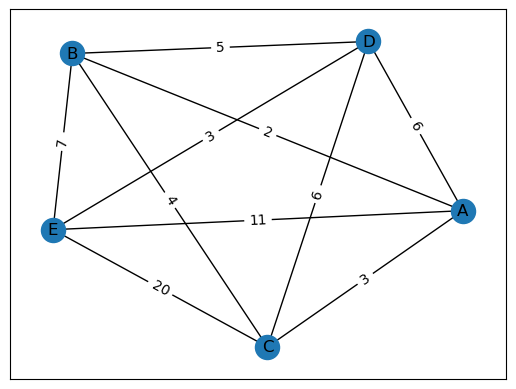

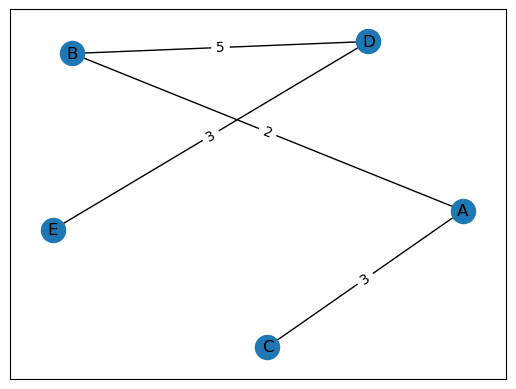

{'A': array([ 0.84416538, -0.20071368]),
 'B': array([-0.66746359,  0.7212139 ]),
 'C': array([ 0.08752771, -1.        ]),
 'D': array([0.47836085, 0.79173522]),
 'E': array([-0.74259035, -0.31223543])}

In [107]:
from string import ascii_uppercase
import networkx as nx
import matplotlib.pyplot as plt
import math

class Graph:
    def __init__(self, size):
        self.nodes = { x:[] for x in ascii_uppercase[:size]}
        self.drawing_graph = nx.Graph()
        self.drawing_graph.add_nodes_from(self.nodes.keys())
        self.size = size
        
    def add_edge(self,edge):
        node_from, node_to, weight = edge
        self.add_node(node_from)
        self.add_node(node_to)
        if node_to not in self.nodes[node_from]:
            self.nodes[node_from].append((node_to, weight))
            self.nodes[node_to].append((node_from, weight))
            self.drawing_graph.add_weighted_edges_from([(node_from, node_to, weight)])
            
    def add_node(self, node):
        if node not in self.nodes:
            self.nodes[node] = []
            self.size += 1
        
    def list_nodes(self):
        return self.nodes.keys()
            
    def get_optimal_edge(self, nodes_from, nodes_to): 
        optimal_edge = (None, None, math.inf)
        for candidate_node in nodes_from:
            for node, weight in self.nodes[candidate_node]:
                if weight < optimal_edge[2] and node in nodes_to:
                    optimal_edge = (candidate_node, node, weight)
        return optimal_edge
                
            
    def prim(self):
        start_node = 'A'
            
        prim_tree = Graph(1)
        prim_tree.add_node(start_node)
        while set(prim_tree.nodes) != set(self.nodes):
            nodes_to = prim_tree.list_nodes()
            nodes_from = [x for x in self.list_nodes() if x not in nodes_to]
            optimal_edge = self.get_optimal_edge(nodes_to, nodes_from)
            prim_tree.add_edge(optimal_edge)
            
        return prim_tree
        
            
    def draw(self, pos=None, axes=None):
        if not pos:
            pos = nx.spring_layout(self.drawing_graph, center=(1,1))
        labels = nx.get_edge_attributes(self.drawing_graph, 'weight')
        nx.draw_networkx(self.drawing_graph, pos)
        nx.draw_networkx_edge_labels(self.drawing_graph, pos, edge_labels=labels, ax=axes)
        plt.show()
        return pos
        
g = Graph(5)
pos = nx.spring_layout(g.drawing_graph)
g.add_edge(('A','B',2))
g.add_edge(('A', 'C', 3))
g.add_edge(('A', 'D', 6))
g.add_edge(('B','C',4))
g.add_edge(('B','D',5))
g.add_edge(('E', 'C', 20))
g.add_edge(('E', 'A', 11))
g.add_edge(('D', 'C', 6))
g.add_edge(('D', 'E', 3))
g.add_edge(('E', 'B', 7))

g.draw(pos)
prim = g.prim()
prim.draw(pos)


In [90]:
def fib_programacion_dinamica(n):
    fib = [0,1]
    if n <= len(fib):
        return fib[n-1]
    else:
        for i in range(2, n):
            fib.append(fib[i-1] + fib[i-2])
    return fib[n-1]

def fib_recursivo(n):
    if n == 0:
        return 0
    if n == 1:
        return 1
    else:
        return fib_recursivo(n-1) + fib_recursivo(n-2)

In [31]:
test =[0, 1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181, 6765, 10946, 17711, 28657, 46368]
for index, f in enumerate(test):
    dinamica = fib_programacion_dinamica(index+1) 
    recursiva = fib_recursivo(index)
    assert( dinamica == f)
    assert( recursiva == f)

%timeit fib_programacion_dinamica(40)
%timeit fib_recursivo(40)


3.28 µs ± 52.8 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)
25.8 s ± 22 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
